# A Comprehensive Analysis Of Predicting Housing Prices


## Introduction

In the ever-evolving real estate market, accurately predicting housing prices is crucial for investors, homeowners, and policy makers alike. This project aims to leverage the power of data science to forecast housing prices based on a variety of features, including location, square footage, and additional house characteristics. Through meticulous data importing, cleaning, and manipulation, followed by exploratory data analysis (EDA), hypothesis testing, and predictive modeling, we seek to uncover the underlying patterns that drive housing prices.

Our journey begins with gathering comprehensive housing data from various sources, followed by rigorous preprocessing to ensure data quality and usability. We then dive deep into the data, employing statistical and visual analysis techniques to explore relationships and trends. Hypothesis testing allows us to challenge assumptions and gain insights, while machine learning models enable us to predict prices with accuracy. Finally, we encapsulate our findings, model performance, and insights in a detailed report, complemented by visualizations to aid in understanding.

This notebook serves as a structured guide through each phase of the project, from data importation to predictive analytics and reporting. Whether you're a seasoned data scientist or a curious enthusiast, this analysis aims to provide valuable insights into the dynamics of housing prices and demonstrate the power of data-driven decision-making in the real estate domain.


# Lets Begin!


## Data Importing

#### Here we get the dataset taken from [HERE](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur?resource=download)

In this cell, we are importing data into our Python environment. The process of data importing involves loading data from an external source into our program. Here's what's happening in this cell:

1. Importing Required Libraries:

   - We are importing the pandas library, which is a powerful data manipulation library in Python. It's commonly used for data cleaning, exploration, and analysis.

2. Data Loading:
   - We are using the `pd.read_csv()` function to read a CSV file. The CSV file is a common data format that stores tabular data.
   - The path to the CSV file is provided as an argument to the `pd.read_csv()` function. This path could be a local file path or a URL to a raw CSV file online.
   - The data from the CSV file is loaded into a DataFrame, which is a two-dimensional tabular data structure in pandas. The DataFrame is stored in the variable `df`.

After the data is loaded, we typically perform exploratory data analysis and data cleaning tasks to prepare the data for further analysis or modeling.


In [189]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [190]:
import pandas as pd

#Read the housing.csv file

df = pd.read_csv("housing.csv")

df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


## Data Cleaning

In this cell, we perform data manipulation tasks on the DataFrame `df`. The purpose of data cleaning is to clean and transform the data to make it suitable for analysis.

1. Removing 'RM ' prefix and converting the 'Price' column to numeric format:

   - The 'Price' column contains values formatted like "RM 1,250,000".
   - We remove the 'RM ' prefix using the `str.replace()` method and replace any commas in the numbers.
   - Then, we convert the 'Price' column to a numeric format using the `pd.to_numeric()` function.

2. Filling missing values in the 'Furnishing' column with the placeholder "Unknown":

   - We use the `fillna()` method to replace missing values in the 'Furnishing' column with the string "Unknown".

3. Deleting rows where the 'Price' or 'Rooms' columns have missing values:

   - We use the `dropna()` method to remove rows where the 'Price' or 'Rooms' columns have missing values.

4. Replacing NaN values in the 'Car Parks' column with 0:
   - We use the `fillna()` method to replace NaN values in the 'Car Parks' column with 0.

After performing these data manipulation tasks, the cleaned DataFrame is displayed to verify the changes made.

Summary of the DataFrame after data cleaning:

- The DataFrame has a total of 51,980 entries.
- The columns in the DataFrame are 'Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type', 'Size', and 'Furnishing'.
- The 'Price', 'Rooms', 'Bathrooms', 'Car Parks', and 'Size' columns have numeric data types.
- The 'Location', 'Property Type', and 'Furnishing' columns have object data types.


In [191]:
#'Price' column contains values formatted like "RM 1,250,000"
# Remove 'RM ' prefix and convert to numeric
df['Price'] = df['Price'].str.replace('RM ', '').str.replace(",","")

# Convert the 'Price' column to numeric values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Display the cleaned head of the DataFrame to verify changes
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [192]:
print(df.isnull().sum())


Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64


In [193]:
# Handling Missing Values
# For categorical columns,want to fill NaN with a placeholder "Unknown"
df['Furnishing'] = df['Furnishing'].fillna('Unknown')

#Delete Row where "Price" is NaN
df.dropna(subset=['Price'], inplace=True)

# Delete Row where "Rooms" is NaN
df.dropna(subset=['Rooms'], inplace=True)

# Delete Row where "Bathrooms" is NaN
df.dropna(subset=['Bathrooms'], inplace=True)

# Replace NaN values in 'Car Parks' column with 0
df['Car Parks'] = df['Car Parks'].fillna(0)

# Display the cleaned DataFrame to verify changes
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished


In [194]:
import numpy as np
# Converting Data Types

#cleaning 'Size' column by following the regex pattern (Built-up|Land area) : (\d{1,3},?\d{3}|\d{3}) sq\. ft\. no match mean delete the row
df = df[df['Size'].str.match(r'(Built-up|Land area) : (\d{1,3},?\d{3}|\d{3}) sq\. ft\.', na=False)]

# Extracting Numeric Data from 'Size' column
df['Size'] = df['Size'].str.extract(r'(\d+,\d+|\d+)').replace(',', '', regex=True).astype(float)

#rename the column 'Size' to 'Sqft'
df.rename(columns={'Size': 'Sqft'}, inplace=True)

#remove the () in 'Property Type' column and remove spaces in the beginning and end of the string
df['Property Type'] = df['Property Type'].str.replace(r"\(.*\)", "", regex=True)
df['Property Type'] = df['Property Type'].str.strip()


#'Rooms' should be numeric, we need a custom function to handle "2+1" cases
def convert_rooms(room):

    if pd.isnull(room):
        return np.nan  # Return NaN for missing values
    
    parts = room.split('+')

    if len(parts) == 2:

        if parts[1] != "": # Check if the second part is not empty (e.g. "2+")

            return float(parts[0]) + float(parts[1])  # Example conversion: "2+1" becomes 3.0
        
        else:

            return float(parts[0])
    try:

        return float(room)
    
    except ValueError:
        return np.nan  # Return NaN if conversion fails

# Apply the custom function to 'Rooms' column
df['Rooms'] = df['Rooms'].apply(convert_rooms)
df.dropna(subset=['Rooms'], inplace=True)

# Handling Infinite Values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the cleaned DataFrame to verify changes
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Sqft,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3.0,3.0,2.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6.0,7.0,0.0,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3.0,4.0,2.0,Condominium,1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,5.0,3.0,2.0,Condominium,1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,6.0,5.0,4.0,Bungalow,7200.0,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur",5100000.0,6.0,4.0,0.0,Bungalow,7168.0,Fully Furnished
53879,"Bangsar, Kuala Lumpur",5000000.0,5.0,4.0,0.0,Bungalow,15000.0,Unfurnished
53880,"Bangsar, Kuala Lumpur",5500000.0,6.0,4.0,0.0,Bungalow,7168.0,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur",480000.0,3.0,2.0,0.0,Condominium,1150.0,Unfurnished


In [195]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Data Manipulation ✏️

In this cell, we are performing several data manipulation tasks on the DataFrame `df`. Here's what's happening:

Installing the `scikit-learn` used for ML eventually and Labeling

1. One-Hot Encoding:

   - The 'Furnishing' column is being encoded using one-hot encoding. This is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we convert each category value into a new column and assign a 1 or 0 (True/False) value to the column Also Droping the `Furnishing_Unknown` column from the table s.

2. Outlier Removal:

   - The function `IQR_outliers()` is defined to remove outliers from a specified column of the DataFrame. Outliers are extreme values that deviate from other observations on data, they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.
   - The function calculates the Interquartile Range (IQR), which is a measure of statistical dispersion, and uses it to define the upper and lower bounds for outliers. Any data points that fall below the lower bound or above the upper bound are considered outliers.
   - This function is applied to the 'Price' and 'Size' columns of the DataFrame.

3. Feature Engineering:

   - A new column 'Price per Sqft' is created by dividing the 'Price' column by the 'Size' column. This could provide a more standardized measure of price that takes into account the size of the property.

4. Label Encoding:
   - The 'Property Type' column is being encoded using label encoding. This is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Finally, the first few rows of the cleaned DataFrame are displayed to verify the changes.

### Label Encoding of 'Property Type'

0 -> 1-sty Terrace/Link House

1 -> 1.5-sty Terrace/Link House

2 -> 2-sty Terrace/Link House

3 -> 2.5-sty Terrace/Link House

4 -> 3-sty Terrace/Link House

5 -> 3.5-sty Terrace/Link House

6 -> 4-sty Terrace/Link House

7 -> 4.5-sty Terrace/Link House

8 -> Apartment

9 -> Bungalow

10 -> Cluster House

11 -> Condominium

12 -> Flat

13 -> Residential Land

14 -> Semi-detached House

15 -> Serviced Residence

16 -> Townhouse


In [196]:
#Encode the 'Furnishing' column using one-hot encoding
df = pd.get_dummies(df, columns=['Furnishing'], prefix='Furnishing')

# Remove row with "Furnishing_Unknown" column
df = df.drop(columns=['Furnishing_Unknown'])

df = df[df['Sqft'] <= 30000]

df['PricePerSqft'] = df['Price'] / df['Sqft']


def IQR_outliers(df, column, multiplier):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]


df = IQR_outliers(df, 'PricePerSqft', multiplier=1.5)
df = IQR_outliers(df, 'Price', multiplier=1.5)
df = IQR_outliers(df, 'Sqft', multiplier=1.5)


# def MAD_outliers(df, column, threshold):
#     median = df[column].median()
#     deviations = abs(df[column] - median)
#     MAD = deviations.median()
#     lower_bound = median - threshold * MAD
#     upper_bound = median + threshold * MAD
#     return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

# df = MAD_outliers(df, 'Price', threshold=3.0)
# df = MAD_outliers(df, 'Sqft', threshold=3.0)


# def cap_outliers(df, column, threshold, max_price_per_sqft):
#     median = df[column].median()
#     deviations = abs(df[column] - median)
#     MAD = deviations.median()
#     lower_bound = median - threshold * MAD
#     upper_bound = median + threshold * MAD
#     capped_values = df[column].clip(lower=lower_bound, upper=upper_bound)
    
#     # Disregard data points with price per sqft exceeding the maximum
#     df['Price per Sqft'] = df['Price'] / df['Sqft']
#     df = df[df['Price per Sqft'] <= max_price_per_sqft]
    
#     df[column] = capped_values
#     return df


# # # Create a new column 'Price per Sqft' by dividing 'Price' by 'Sqft'
# df['Price per Sqft'] = df['Price'] / df['Sqft']

# # Set a maximum  price per sqft value by getting the maximum value from the 'Price per Sqft' column

# max_price_per_sqft = df['Price per Sqft'].max()  # Adjust as needed based on your data and context
# df = cap_outliers(df, 'Price', threshold=2.0, max_price_per_sqft=max_price_per_sqft)
# df = cap_outliers(df, 'Sqft', threshold=2.0, max_price_per_sqft=max_price_per_sqft)


# def cap_outliers(df, column, threshold, max_price_per_sqft, min_price):
#     median = df[column].median()
#     deviations = abs(df[column] - median)
#     MAD = deviations.median()
#     lower_bound = median - threshold * MAD
#     upper_bound = median + threshold * MAD
#     capped_values = df[column].clip(lower=lower_bound, upper=upper_bound)
    
#     # Disregard data points with price per sqft exceeding the maximum
#     df = df[df['PricePerSqft'] <= max_price_per_sqft]
    
#     # Set a minimum price
#     df = df[df['Price'] >= min_price]
    
#     df[column] = capped_values
#     return df




# # Set a maximum reasonable price per square foot
# max_price_per_sqft = 900  # Adjust as needed based on your data and context
# # Set a minimum price
# min_price = 100000  # Adjust as needed based on your data and context
# df = cap_outliers(df, 'Price', threshold=3.0, max_price_per_sqft=max_price_per_sqft, min_price=min_price)
# df = cap_outliers(df, 'Sqft', threshold=3.0, max_price_per_sqft=max_price_per_sqft, min_price=min_price)

#remover outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df['Price'])) < 3)]
df = df[(np.abs(stats.zscore(df['Sqft'])) < 3)]
df = df[(np.abs(stats.zscore(df['Rooms'])) < 3)]
df = df[(np.abs(stats.zscore(df['Bathrooms'])) < 3)]
df = df[(np.abs(stats.zscore(df['Car Parks'])) < 3)]
df = df[(np.abs(stats.zscore(df['PricePerSqft'])) < 3)]



#label encode the 'Property Type' column
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Property Type' column
df['Property Type'] = label_encoder.fit_transform(df['Property Type'])


df["Location"] = df["Location"].str.replace(", Kuala Lumpur", "")

# Encode the 'location' column
df['Location'] = label_encoder.fit_transform(df['Location'])
# Display the cleaned DataFrame to verify changes
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Sqft,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,PricePerSqft
0,35,1250000.0,3.0,3.0,2.0,14,1335.0,True,False,False,936.329588
2,24,1030000.0,3.0,4.0,2.0,10,1875.0,False,True,False,549.333333
4,13,900000.0,5.0,3.0,2.0,10,1513.0,False,True,False,594.844679
9,57,385000.0,3.0,2.0,1.0,7,904.0,False,True,False,425.884956
12,64,1700000.0,4.0,3.0,0.0,2,1900.0,False,True,False,894.736842


## Exploratory Data Analysis (EDA) and Visualization 📊 📈

Exploratory Data Analysis (EDA) allows us to dive deep into the dataset, uncovering patterns, relationships, and insights. Through visualizations such as histograms, scatter plots, and heatmaps, we gain a comprehensive understanding of the data's characteristics and the factors influencing housing prices. This visual and statistical exploration is pivotal in guiding our hypothesis testing and predictive modeling efforts.


In [197]:
%pip install matplotlib

%pip install seaborn

%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [198]:
#show the summary statistics of the cleaned DataFrame
df.describe()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Sqft,PricePerSqft
count,32546.000000,3.254600e+04,32546.000000,32546.000000,32546.000000,32546.000000,32546.000000,32546.000000
mean,33.250599,8.777076e+05,3.126436,2.406686,1.239630,10.743348,1302.797640,670.474662
std,17.194175,5.196852e+05,0.969257,0.906458,0.886146,2.877630,498.325529,293.543274
min,0.000000,3.080000e+02,1.000000,1.000000,0.000000,0.000000,250.000000,0.375610
25%,16.000000,4.990000e+05,3.000000,2.000000,1.000000,10.000000,948.000000,452.953746
50%,35.000000,7.100000e+05,3.000000,2.000000,1.000000,10.000000,1200.000000,607.255521
75%,47.000000,1.170000e+06,4.000000,3.000000,2.000000,14.000000,1550.000000,825.841054
max,68.000000,2.730200e+06,6.000000,5.000000,4.000000,15.000000,2961.000000,1574.616457


### Distribution Analysis


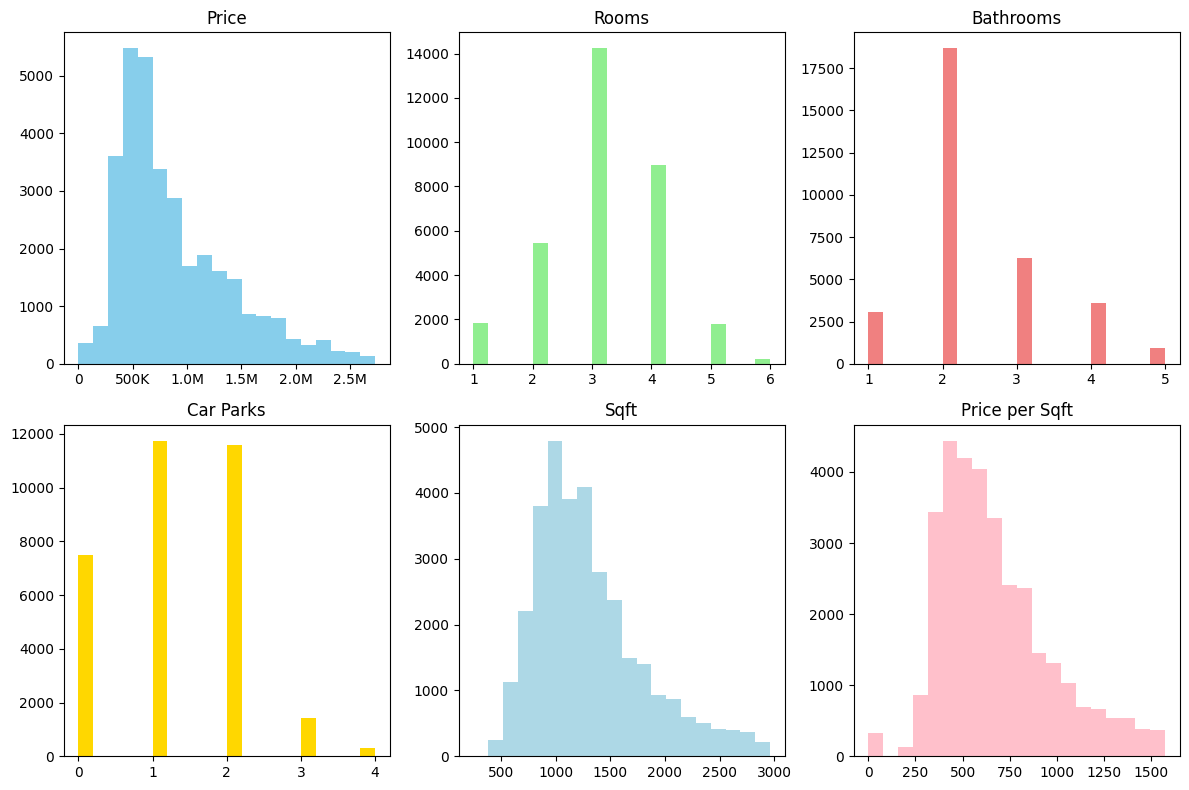

In [199]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create subplots for histograms
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot histograms for 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Sqft', and 'Price per Sqft'

# Custom formatter function to display numbers in thousands (K) and millions (M)
def custom_formatter(x, pos):
    if x >= 1e6:  # If 1 million or more
        return '{:,.1f}M'.format(x*1e-6)  # Convert to M
    elif x >= 1e3:  # If 1 thousand or more
        return '{:,.0f}K'.format(x*1e-3)  # Convert to K
    else:
        return '{:,.0f}'.format(x)  # No suffix

axs[0, 0].hist(df['Price'], bins=20, color='skyblue')
axs[0, 0].set_title('Price')
axs[0,0].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

axs[0, 1].hist(df['Rooms'], bins=20, color='lightgreen')
axs[0, 1].set_title('Rooms')

axs[0, 2].hist(df['Bathrooms'], bins=20, color='lightcoral')
axs[0, 2].set_title('Bathrooms')

axs[1, 0].hist(df['Car Parks'], bins=20, color='gold')
axs[1, 0].set_title('Car Parks')

axs[1, 1].hist(df['Sqft'], bins=20, color='lightblue')
axs[1, 1].set_title('Sqft')

axs[1, 2].hist(df['PricePerSqft'], bins=20, color='pink')
axs[1, 2].set_title('Price per Sqft')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# use plotly to create a scatter plot of 'Price' vs 'Sqft'
import plotly.express as px

# Create a scatter plot of 'Price' vs 'Sqft'

fig = px.scatter(df, x='Sqft', y='Price', title='Price vs. Sqft', labels={'Sqft': 'Sqft (sq. ft.)', 'Price': 'Price (RM)'})
fig.show()



# TODO: EXPLAINING THE ABOVE ⬆️


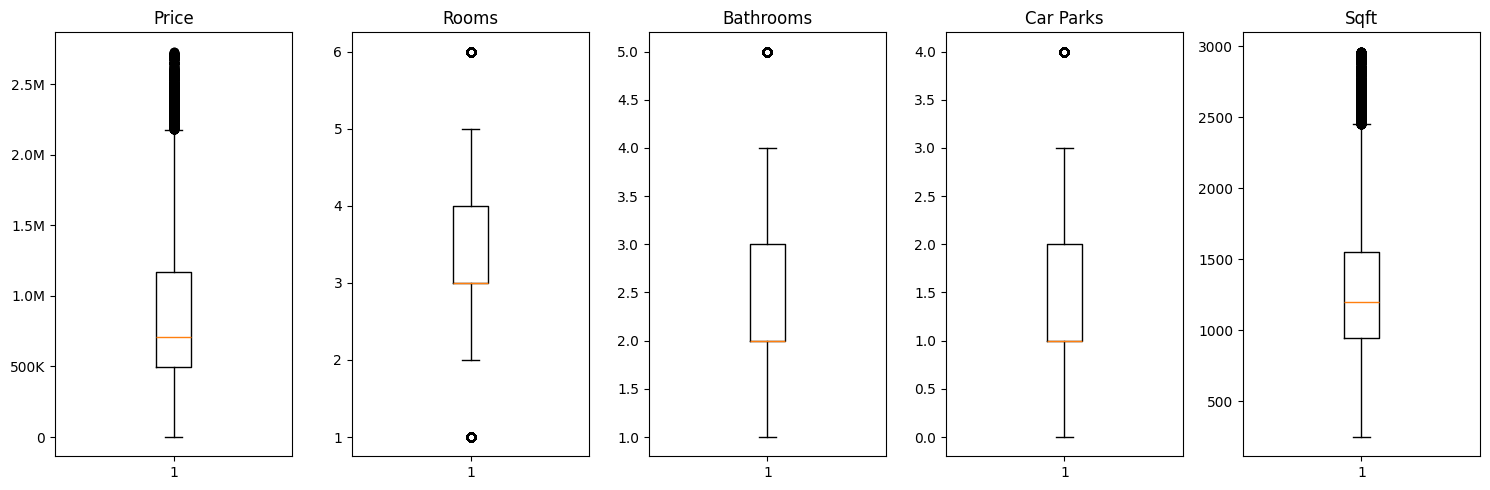

In [200]:

# Create subplots for box plots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot box plots for 'Price', 'Rooms', 'Bathrooms', 'Car Parks', and 'Sqft'
axs[0].boxplot(df['Price'])
axs[0].set_title('Price')
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

axs[1].boxplot(df['Rooms'])
axs[1].set_title('Rooms')
axs[2].boxplot(df['Bathrooms'])
axs[2].set_title('Bathrooms')
axs[3].boxplot(df['Car Parks'])
axs[3].set_title('Car Parks')
axs[4].boxplot(df['Sqft'])
axs[4].set_title('Sqft')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


## Hypothesis Testing

Armed with insights from our EDA, we formulate and test hypotheses regarding factors that may influence housing prices. Utilizing statistical tests, such as t-tests or chi-square tests, we assess the validity of these hypotheses, providing a data-driven foundation for our predictive models. This step is crucial for identifying significant variables and relationships within our dataset.


In [201]:
print(df.isnull().sum())


Location                       0
Price                          0
Rooms                          0
Bathrooms                      0
Car Parks                      0
Property Type                  0
Sqft                           0
Furnishing_Fully Furnished     0
Furnishing_Partly Furnished    0
Furnishing_Unfurnished         0
PricePerSqft                   0
dtype: int64


## Predictive Analytics (Machine Learning / Deep Learning)

Transitioning from analysis to prediction, we employ machine learning models to forecast housing prices. This phase involves splitting our data into training and testing sets, selecting appropriate models, and training them on our dataset. Through model evaluation, we assess the accuracy and effectiveness of our predictions, striving for models that offer both high precision and generalizability.


In [202]:
# prepare the data for training and testing
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model

model = LinearRegression()

# Train the model on the training data

model.fit(X_train, y_train)

# graph the model history

# Predict the target on the training data

y_train_pred = model.predict(X_train)

# Predict the target on the testing data

y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error on the training and testing data

train_mse = mean_squared_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.2f}')

print(f'Test MSE: {test_mse:.2f}')


LinearRegression()

## Extra Bonus Components

Beyond the core components of our project, we explore additional enhancements such as web deployment, dashboard creation, prescriptive analytics, and GUI development. These extra features aim to extend the applicability and accessibility of our analysis, offering real-time insights, interactive visualizations, and user-friendly interfaces for diverse audiences.
